<a href="https://colab.research.google.com/github/Akhilajithkumar2459/ML-Practice/blob/main/MLR_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [121]:
### importing BostonHouse pricing Dataset

In [122]:
data=pd.read_csv('/content/CarPrice_Assignment.csv')

In [123]:
data


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [124]:
data.shape

(205, 26)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [126]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [127]:
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [128]:
data['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [129]:
data['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [130]:
data['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [131]:
data['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [132]:
data['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [133]:
data['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [134]:
data['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [135]:
data['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [136]:
data['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [137]:
data['CarName']=data['CarName'].astype('category')
data['fueltype']=data['fueltype'].astype('category')
data['aspiration']=data['aspiration'].astype('category')
data['doornumber']=data['doornumber'].astype('category')
data['carbody']=data['carbody'].astype('category')
data['drivewheel']=data['drivewheel'].astype('category')
data['enginelocation']=data['enginelocation'].astype('category')
data['enginetype']=data['enginetype'].astype('category')
data['cylindernumber']=data['cylindernumber'].astype('category')
data['fuelsystem']=data['fuelsystem'].astype('category')

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    int64   
 1   symboling         205 non-null    int64   
 2   CarName           205 non-null    category
 3   fueltype          205 non-null    category
 4   aspiration        205 non-null    category
 5   doornumber        205 non-null    category
 6   carbody           205 non-null    category
 7   drivewheel        205 non-null    category
 8   enginelocation    205 non-null    category
 9   wheelbase         205 non-null    float64 
 10  carlength         205 non-null    float64 
 11  carwidth          205 non-null    float64 
 12  carheight         205 non-null    float64 
 13  curbweight        205 non-null    int64   
 14  enginetype        205 non-null    category
 15  cylindernumber    205 non-null    category
 16  enginesize        205 non-

In [139]:
data['CarName']=data['CarName'].cat.codes
data['fueltype']=data['fueltype'].cat.codes
data['aspiration']=data['aspiration'].cat.codes
data['doornumber']=data['doornumber'].cat.codes
data['carbody']=data['carbody'].cat.codes
data['drivewheel']=data['drivewheel'].cat.codes
data['enginelocation']=data['enginelocation'].cat.codes
data['enginetype']=data['enginetype'].cat.codes
data['cylindernumber']=data['cylindernumber'].cat.codes
data['fuelsystem']=data['fuelsystem'].cat.codes

In [153]:
x=(data.iloc[:,:25])
y=data.iloc[:,25:26]

In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=40)

In [155]:
model=LinearRegression()
regressor=model.fit(x_train,y_train)

In [156]:
y_pred=regressor.predict(x_test)
print(y_pred)

[[19382.49287832]
 [14631.33560979]
 [17421.98673182]
 [ 9137.49171763]
 [ 8466.99257084]
 [ 9951.70756745]
 [11447.40688119]
 [ 7062.83495006]
 [28935.49173134]
 [ 5559.11571079]
 [ 9466.14892624]
 [ 9503.89558613]
 [ 7253.5392808 ]
 [ 7601.9289622 ]
 [12064.89729873]
 [ 6887.67659598]
 [ 7215.29975073]
 [ 9189.81687258]
 [ 7345.28835742]
 [11781.13705301]
 [ 6265.68031042]
 [13187.36652868]
 [10692.13364658]
 [ 5872.91004797]
 [13527.88943179]
 [14542.95399035]
 [ 5972.99186648]
 [16702.84034169]
 [14298.41569368]
 [ 6984.74571621]
 [ 8153.44680258]
 [11512.73909803]
 [14411.70013054]
 [ 7729.20069945]
 [16140.35293107]
 [12077.51970159]
 [ 6299.54716682]
 [12056.72244882]
 [13602.41559251]
 [ 5223.62075013]
 [ 6701.06265837]
 [14177.96974707]
 [ 6977.4005207 ]
 [19917.89284499]
 [ 9195.88508239]
 [ 6331.4629452 ]
 [ 8424.76200654]
 [15374.69545056]]


Text(0, 0.5, 'Predicted Y')

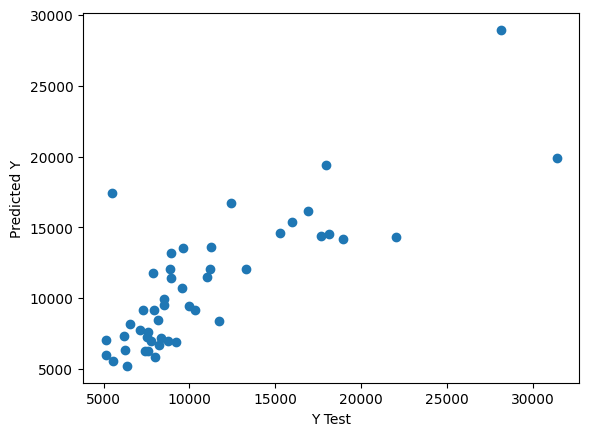

In [171]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')